In [17]:
import ee
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geemap

geemap.ee.Initialize()
%matplotlib inline
 
# Initialize the GEE
ee.Initialize()
Map = geemap.Map()
print("Initialised")

Initialised


In [24]:
point = ee.Geometry.Point([ 178.02, -38.6636]) # Gisborne, NZ
Map.centerObject(point,10)
Map

Map(bottom=161903.0, center=[-38.6636, 178.02], controls=(WidgetControl(options=['position', 'transparent_bg']…

range(2022, 2023)
2022 1
2022 2
2022 3
2022 4
2022 5
2022 6
2022 7
2022 8
2022 9
2022 10
2022 11
2022 12


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

    id   longitude   latitude precipitation
1    0  177.978716 -38.739847      39.93999
2    1  177.978716 -38.739847     92.413626
3    2  177.978716 -38.739847    120.131705
4    3  177.978716 -38.739847    102.670871
5    4  177.978716 -38.739847    115.103417
6    5  177.978716 -38.739847    160.895663
7    6  177.978716 -38.739847    169.714101
8    7  177.978716 -38.739847    127.003318
9    8  177.978716 -38.739847    191.077576
10   9  177.978716 -38.739847     62.987992
11  10  177.978716 -38.739847    133.244241
12  11  177.978716 -38.739847     114.12923


findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not found.
findfont: Font family 'normal' not

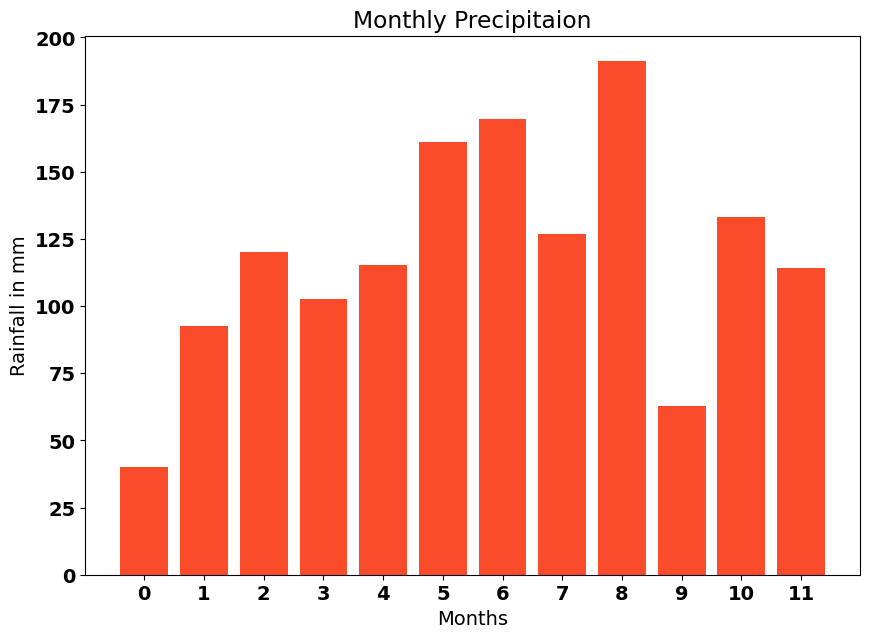

In [23]:
# import the RS products
chirps = ee.ImageCollection('UCSB-CHG/CHIRPS/PENTAD')
 
# Define time range
startyear = 2022
endyear = 2023

# Set date in ee date format
startdate = ee.Date.fromYMD(startyear,1,1)
enddate = ee.Date.fromYMD(endyear+1,12,31)

 
# create list for years
years = range(startyear,endyear);
print(years) 
# make a list with months
months = range(1,13)

#Filter to select Precipitation band
PrecipitationChirps = chirps.filterDate(startdate, enddate).sort('system:time_start', False).select("precipitation")
 
# calculate the monthly mean
def MonthlyMean(imageCollection):
    mylist = ee.List([])
    for y in years:
        for m in months:
            print(y,m)
            w = imageCollection.filter(ee.Filter.calendarRange(y, y, 'year')).filter(ee.Filter.calendarRange(m, m, 'month')).sum()
            #mylist = mylist.add(w)
            mylist = mylist.add(w.set('year', y).set('month', m).set('date', ee.Date.fromYMD(y,m,1)).set('system:time_start',ee.Date.fromYMD(y,m,1)))
    return ee.ImageCollection.fromImages(mylist)
 
# run the calcMonthlyMean function
monthlyChirps = ee.ImageCollection(MonthlyMean(PrecipitationChirps))


# select the region of interest, 25000 is the cellsize in meters
monthlyChirps = monthlyChirps.getRegion(point,25000,"epsg:4326").getInfo()


# get january (index = 0)
precipiation = pd.DataFrame(monthlyChirps, columns = monthlyChirps[0])


# remove the first line
precipiation = precipiation[1:]

#to display the data
print(precipiation[['id','longitude','latitude','precipitation']])


#To export to CSV
precipiation.to_csv (r'precipitation.csv', index = False, header=True)





In [21]:


# To display the data in the chart
#style the font size
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 14}
plt.rc('font', **font)

#chart Title
plt.title('Monthly Precipitaion')

#chart lable for x axis
plt.xlabel('Months')

#chart lable for y axis
plt.ylabel('Rainfall in mm')

#chart size and data assign
plt.bar(precipiation['id'], precipiation['precipitation'], color='#fa4b2a')
plt.rcParams["figure.figsize"] = (10,7)

#export chart as png
plt.savefig('precipitation.png')